In [1]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



# Data reading and Exploring

In [2]:

dodoma_Temp = pd.read_csv('tztemp - tztemp.csv', index_col='DATE')
dodoma_Temp.shape

(11547, 5)

In [3]:
dodoma_Temp.describe()

,TAVG,TMAX,TMIN
count,11547.000000,8576.000000,6850.000000
mean,73.181259,84.461171,64.117226
std,3.303249,3.974893,3.465426
min,63.000000,71.000000,52.000000
25%,71.000000,81.000000,62.000000
50%,73.000000,84.000000,65.000000
75%,76.000000,87.000000,67.000000
max,84.000000,96.000000,71.000000


In [4]:
dodoma_Temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11547 entries, 2019-01-01 to 2023-11-11
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  11547 non-null  object 
 1   NAME     11547 non-null  object 
 2   TAVG     11547 non-null  int64  
 3   TMAX     8576 non-null   float64
 4   TMIN     6850 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 541.3+ KB


In [5]:
dodoma_Temp.tail()

,STATION,NAME,TAVG,TMAX,TMIN
DATE,,,,,
2023-11-07,TZ000063862,"DODOMA, TZ",78,89.0,NaN
2023-11-08,TZ000063862,"DODOMA, TZ",79,91.0,66.0
2023-11-09,TZ000063862,"DODOMA, TZ",78,NaN,66.0
2023-11-10,TZ000063862,"DODOMA, TZ",76,NaN,NaN
2023-11-11,TZ000063862,"DODOMA, TZ",76,88.0,69.0


In [6]:
dodoma_Temp.columns

Index(['STATION', 'NAME', 'TAVG', 'TMAX', 'TMIN'], dtype='object')

In [7]:
dodoma_Temp.dtypes

STATION     object
NAME        object
TAVG         int64
TMAX       float64
TMIN       float64
dtype: object

# Data Cleaning and Preparation

In [8]:
dodoma_Temp.isna().sum()

STATION       0
NAME          0
TAVG          0
TMAX       2971
TMIN       4697
dtype: int64

### Filling missing values

In [9]:
dodoma_Temp = dodoma_Temp.ffill()
dodoma_Temp.isna().sum()

STATION    0
NAME       0
TAVG       0
TMAX       0
TMIN       1
dtype: int64

In [10]:
dodoma_Temp['TMIN'].fillna(method='bfill', inplace=True)
dodoma_Temp.isna().sum()

STATION    0
NAME       0
TAVG       0
TMAX       0
TMIN       0
dtype: int64

# Data Visualization

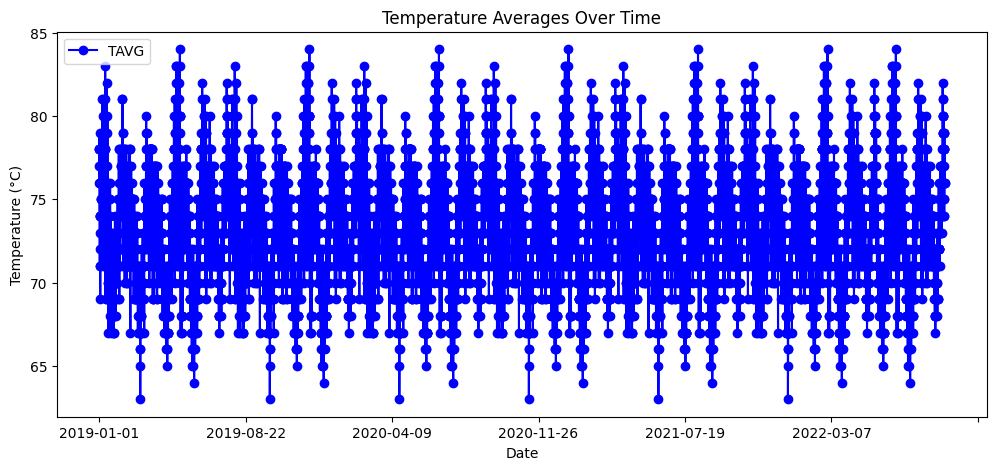

In [11]:
# Line Plot for Temperature Averages (TAVG)
dodoma_Temp['TAVG'].plot(figsize=(12, 5), marker='o', color='blue', label='TAVG')
plt.title('Temperature Averages Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

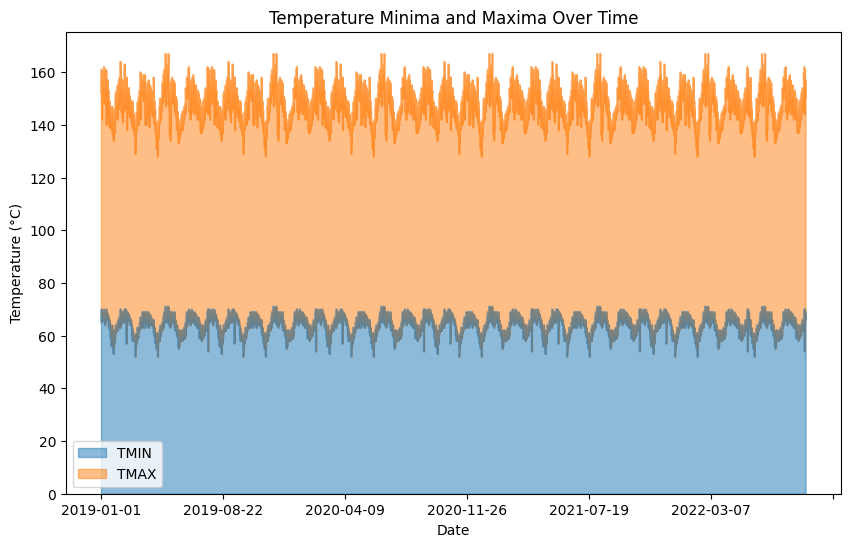

In [12]:
# Area Plot for Temperature Minima and Maxima (TMIN, TMAX)
dodoma_Temp[['TMIN', 'TMAX']].plot.area(figsize=(10, 6), alpha=0.5)
plt.title('Temperature Minima and Maxima Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()

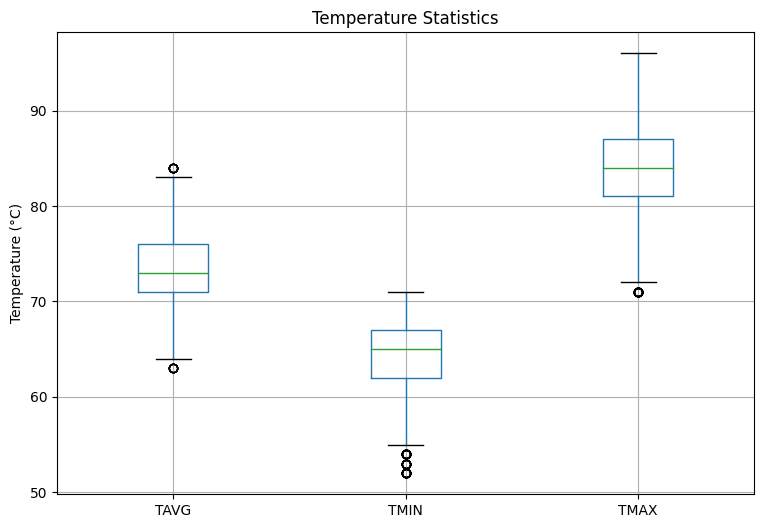

In [13]:
# Box Plot for Temperature Statistics (TAVG, TMIN, TMAX)
dodoma_Temp.boxplot(column=['TAVG', 'TMIN', 'TMAX'], figsize=(9, 6))
plt.title('Temperature Statistics')
plt.ylabel('Temperature (°C)')
plt.show()


In [14]:
dodoma_Temp.index = pd.to_datetime(dodoma_Temp.index)
last_ten_months_data = dodoma_Temp.loc['2023-01-01':'2023-11-11']
last_ten_months_data

,STATION,NAME,TAVG,TMAX,TMIN
DATE,,,,,
2023-01-01,TZ000063862,"DODOMA, TZ",80,88.0,67.0
2023-01-02,TZ000063862,"DODOMA, TZ",75,84.0,65.0
2023-01-03,TZ000063862,"DODOMA, TZ",76,87.0,65.0
2023-01-04,TZ000063862,"DODOMA, TZ",77,87.0,67.0
2023-01-05,TZ000063862,"DODOMA, TZ",78,88.0,67.0
...,...,...,...,...,...
2023-11-07,TZ000063862,"DODOMA, TZ",78,89.0,68.0
2023-11-08,TZ000063862,"DODOMA, TZ",79,91.0,66.0
2023-11-09,TZ000063862,"DODOMA, TZ",78,91.0,66.0


In [15]:
last_ten_months_data.info

<bound method DataFrame.info of                 STATION        NAME  TAVG  TMAX  TMIN
DATE                                                 
2023-01-01  TZ000063862  DODOMA, TZ    80  88.0  67.0
2023-01-02  TZ000063862  DODOMA, TZ    75  84.0  65.0
2023-01-03  TZ000063862  DODOMA, TZ    76  87.0  65.0
2023-01-04  TZ000063862  DODOMA, TZ    77  87.0  67.0
2023-01-05  TZ000063862  DODOMA, TZ    78  88.0  67.0
...                 ...         ...   ...   ...   ...
2023-11-07  TZ000063862  DODOMA, TZ    78  89.0  68.0
2023-11-08  TZ000063862  DODOMA, TZ    79  91.0  66.0
2023-11-09  TZ000063862  DODOMA, TZ    78  91.0  66.0
2023-11-10  TZ000063862  DODOMA, TZ    76  91.0  66.0
2023-11-11  TZ000063862  DODOMA, TZ    76  88.0  69.0

[2205 rows x 5 columns]>

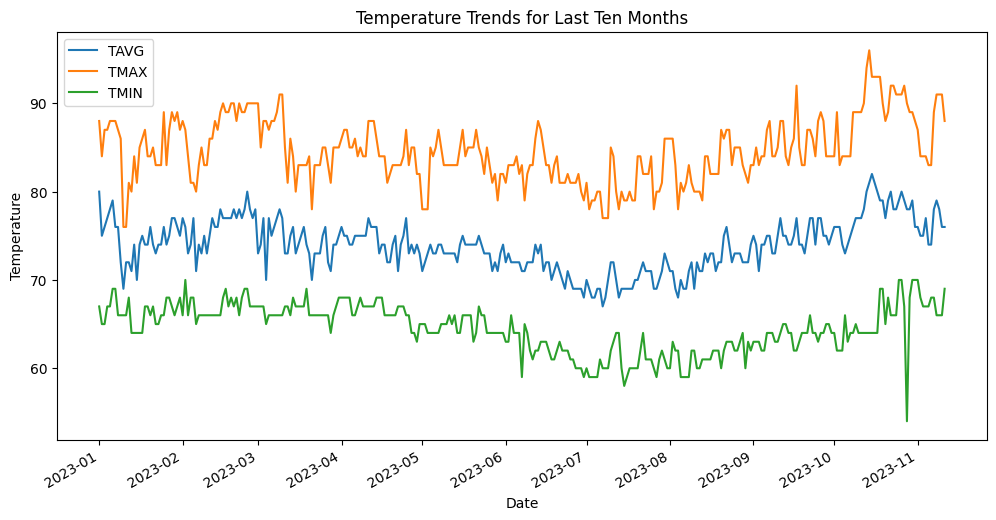

In [16]:
last_ten_months_data[['TAVG', 'TMAX', 'TMIN']].plot(figsize=(12, 6))
plt.title('Temperature Trends for Last Ten Months')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

In [17]:
last_ten_months_data['Month'] = last_ten_months_data.index.month
last_ten_months_data['Day'] = last_ten_months_data.index.day

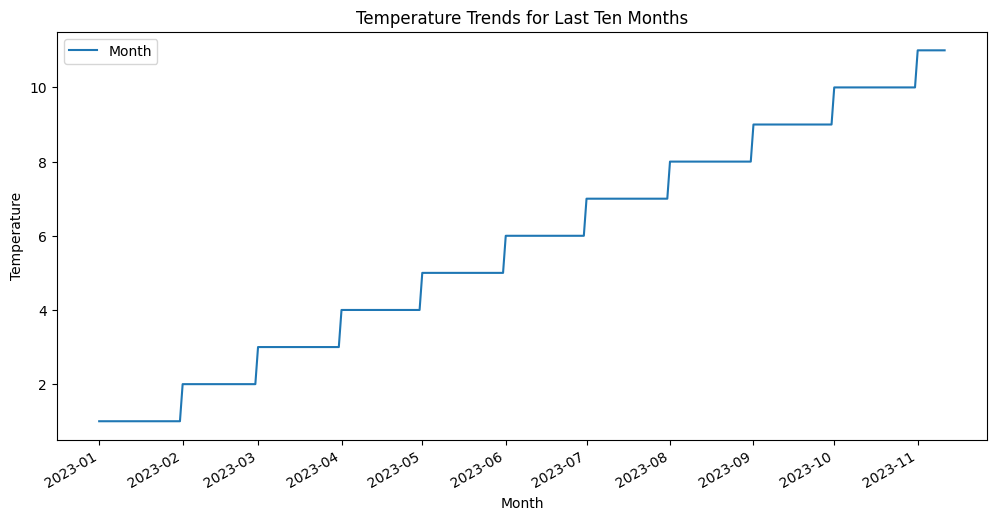

In [32]:
last_ten_months_data[["Month"]].plot(figsize=(12, 6))
plt.title('Temperature Trends for Last Ten Months')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.show()

In [18]:
features = ['TAVG', 'TMIN', 'Month', 'Day']
target = 'TMAX'

In [19]:
last_ten_months_data['Day']

DATE
2023-01-01     1
2023-01-02     2
2023-01-03     3
2023-01-04     4
2023-01-05     5
              ..
2023-11-07     7
2023-11-08     8
2023-11-09     9
2023-11-10    10
2023-11-11    11
Name: Day, Length: 2205, dtype: int64

In [20]:
features

['TAVG', 'TMIN', 'Month', 'Day']

In [21]:
X = last_ten_months_data[features]
y = last_ten_months_data[target]



In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [31]:
y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
r2

0.7535550179444959

In [ ]:
intercept = model.intercept_
coefficients = model.coef_

In [ ]:
prediction_date = pd.to_datetime('2023-11-11')

In [33]:

filtered_data = last_ten_months_data.loc[
                                        (last_ten_months_data["Month"] == prediction_date.month) &
                                        (last_ten_months_data["Day"] == prediction_date.day)]

if filtered_data.empty:
    raise KeyError(f"No data found for {prediction_date}")

prediction_features = filtered_data[features]

predicted_tmax = model.predict(prediction_features)
predicted_tmax

print(f"Tomorrow's Temperature of Dodoma might be: {predicted_tmax[0].round(2)}°F")

Tomorrow's Temperature of Dodoma might be: 86.5°F
